In [2]:
conda env create -f environment.yml

Solving environment: done

_libgcc_mutex-0.1    | 3 KB      | ##################################### | 100% 
ca-certificates-2022 | 124 KB    | ##################################### | 100% 
libstdcxx-ng-11.2.0  | 4.7 MB    | ##################################### | 100% 
ld_impl_linux-64-2.3 | 654 KB    | ##################################### | 100% 
python-dateutil-2.8. | 233 KB    | ##################################### | 100% 
libuuid-1.0.3        | 17 KB     | ##################################### | 100% 
asttokens-2.0.5      | 20 KB     | ##################################### | 100% 
nest-asyncio-1.5.5   | 16 KB     | ##################################### | 100% 
certifi-2022.6.15    | 153 KB    | ##################################### | 100% 
libgcc-ng-11.2.0     | 5.3 MB    | ##################################### | 100% 
six-1.16.0           | 18 KB     | ##################################### | 100% 
jupyter_client-7.2.2 | 193 KB    | ##################################### | 100% 
p

In [1]:
from sagemaker.tensorflow import TensorFlowModel

model = TensorFlowModel(model_data='s3://diversitybucket-v9/models/ssd_mobnet_v9.tar.gz', role='arn:aws:iam::178511518038:role/service-role/AmazonSageMaker-ExecutionRole-20220225T215061',framework_version="2.7.0")

In [2]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.c5.large')

update_endpoint is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


----!

In [3]:
endpoint = predictor.endpoint
endpoint

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


'tensorflow-inference-2022-06-25-07-18-23-510'

In [20]:
# Access images stored in s3 bucket
import boto3

# When running on SageMaker, need execution role
from sagemaker import get_execution_role
role = get_execution_role()

# Connect to S3 bucket and download file
s3 = boto3.resource('s3')

# Declare bucket name, remote file, and destination
my_bucket = s3.Bucket('diversitybucket-v9')

list_images=[]

# Use the Amazon S3 resource object that is now configured with the 
# credentials to access your S3 buckets. 

for object_summary in my_bucket.objects.filter(Prefix="images"):
    list_images.append(object_summary.key)
    
list_images=list_images[1::]
print(list_images)

['images/istockphoto-1027761808-612x612.jpg', 'images/istockphoto-119492252-612x612.jpg', 'images/istockphoto-1198252595.jpg', 'images/istockphoto-1265056799.jpg', 'images/istockphoto-1272744431.jpg', 'images/istockphoto-1284869697-612x612.jpg', 'images/istockphoto-1285126883.jpg', 'images/istockphoto-1312638464.jpg', 'images/istockphoto-1319563618.jpg', 'images/istockphoto-1340023775-612x612.jpg', 'images/istockphoto-1356915087-612x612.jpg', 'images/istockphoto-1363627613.jpg', 'images/istockphoto-185072295-612x612.jpg', 'images/istockphoto-490388124-612x612.jpg', 'images/istockphoto-900855748.jpg', 'images/istockphoto-903724814 - bright.jpg', 'images/istockphoto-903724814 - dark.jpg', 'images/istockphoto-903724814.jpg', 'images/shutterstock_116232448.jpg', 'images/shutterstock_1470647.jpg', 'images/shutterstock_1661728.jpg', 'images/shutterstock_1661728_rotated.jpg', 'images/shutterstock_166_withlabel.jpg', 'images/shutterstock_2077581352.jpg', 'images/shutterstock_2106898196.jpg', '

In [43]:
#index1 = list_images.index('images/istockphoto-1363627613.jpg')
index1 = list_images.index('images/istockphoto-1198252595.jpg')
#index2 = list_images.index('images/istockphoto-1285126883.jpg')
index2 = list_images.index('images/istockphoto-1312638464.jpg')

In [44]:
#Choose image from above list
image_key1=list_images[index1]
image_key2=list_images[index2]

In [45]:
#Keep image name only
image_key1=image_key1[7:] 
image_key2=image_key2[7:] 

In [46]:
import cv2

In [47]:
import my_inference

In [48]:
path1='s3://diversitybucket-v9/images/{}'.format(image_key1)
path2='s3://diversitybucket-v9/images/{}'.format(image_key2)

In [49]:
!aws s3 cp $path1 /root/image.jpg

download: s3://diversitybucket-v9/images/istockphoto-1198252595.jpg to ./image.jpg


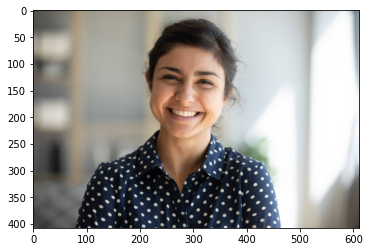

In [50]:
import matplotlib
from matplotlib import pyplot as plt
image_content1=cv2.imread('image.jpg',1) # Checks dimensions of output of cv2.imread
%matplotlib inline
plt.imshow(cv2.cvtColor(image_content1, cv2.COLOR_BGR2RGB))
plt.show()

In [51]:
image_withlabel1, score1 = my_inference.inference('image.jpg',image_content1,predictor,image_key1)

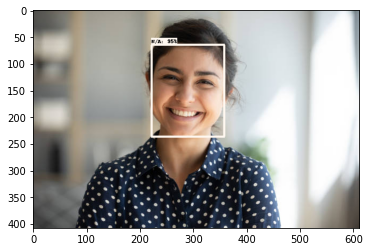

In [52]:
#%matplotlib inline
plt.imshow(image_withlabel1)
plt.imshow(cv2.cvtColor(image_withlabel1, cv2.COLOR_BGR2RGB))

In [53]:
score1

array([0.95780557, 0.0902347 , 0.08287472, 0.08139259, 0.07886618,
       0.07816884, 0.07475755, 0.07433265, 0.07201573, 0.07122555,
       0.07116085, 0.06907883, 0.06870767, 0.06838942, 0.0677411 ,
       0.06737497, 0.06720817, 0.06718826, 0.06679323, 0.06650174,
       0.06557232, 0.06554046, 0.06495127, 0.06454787, 0.06419373,
       0.06249648, 0.06233039, 0.06049639, 0.05952978, 0.05912453,
       0.05882421, 0.05844989, 0.05843404, 0.05831715, 0.05672196,
       0.05663034, 0.05654448, 0.05636641, 0.05506563, 0.0547778 ,
       0.05468214, 0.05467743, 0.05420271, 0.05340257, 0.05263725,
       0.05173746, 0.05141336, 0.0512704 , 0.05118307, 0.05098024,
       0.0508678 , 0.05053294, 0.0501745 , 0.04986423, 0.04972848,
       0.0494625 , 0.04932863, 0.04921457, 0.04916576, 0.048186  ,
       0.04811963, 0.04788083, 0.04785928, 0.04747972, 0.04744816,
       0.04725984, 0.04719514, 0.04649442, 0.04637989, 0.04626924,
       0.04614449, 0.04584485, 0.04578087, 0.04574966, 0.04482

In [54]:
!aws s3 cp $path2 /root/image.jpg

download: s3://diversitybucket-v9/images/istockphoto-1312638464.jpg to ./image.jpg


In [55]:
image_content2=cv2.imread('image.jpg',1)
image_withlabel2, score2 = my_inference.inference('image.jpg',image_content2,predictor,image_key2)


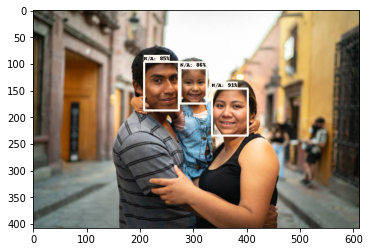

In [56]:
#%matplotlib inline
plt.imshow(image_withlabel2)
plt.imshow(cv2.cvtColor(image_withlabel2, cv2.COLOR_BGR2RGB))

In [57]:
score2

array([0.91972113, 0.86488545, 0.85784674, 0.19836292, 0.11998475,
       0.10713422, 0.10108766, 0.08504891, 0.08326888, 0.08165288,
       0.0814285 , 0.07933235, 0.07894531, 0.07721704, 0.07327089,
       0.07307768, 0.07038724, 0.06978726, 0.06799501, 0.06499115,
       0.06321821, 0.0622561 , 0.0614166 , 0.06115037, 0.06058344,
       0.05878633, 0.05869955, 0.05846736, 0.05726242, 0.05611378,
       0.05577499, 0.05575612, 0.05409592, 0.05381522, 0.0538131 ,
       0.0524002 , 0.0518316 , 0.05140582, 0.05130759, 0.05025566,
       0.0495702 , 0.049274  , 0.04916617, 0.04837367, 0.048325  ,
       0.04820412, 0.04771289, 0.0476684 , 0.04690796, 0.0463987 ,
       0.04578164, 0.04543313, 0.04526326, 0.04508683, 0.044956  ,
       0.04436284, 0.04424897, 0.04392737, 0.04345173, 0.04327196,
       0.04314673, 0.0430527 , 0.04302955, 0.04254043, 0.04248858,
       0.0424211 , 0.04233623, 0.04189026, 0.04183427, 0.04123721,
       0.04115352, 0.04074708, 0.04071561, 0.04051858, 0.04043